<h1 style="color:Green;">Week 4 Lab - due by 31st July, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_jQKSrS4hiVJaxnFYhRh284AhAbPxI0CL0qAP4Iz-DE/edit#slide=id.p">[Week 4 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to implement machine learning methods and models on classification problems</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_multilabel_classification

import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: SPY Directional Move</h2><br/>

Recall that at the end of the Week 3 lecture, we converted the SPY log return into binary values such that 0 represents a day with negative return and 1 represents a day with positive return. Then, we used the XLK and IYC log returns to predict SPY log return. <br>

The first model we implemented was logistic regression. Let's examine other models and compare their performances.

a) The 'SPY_XLK_IYC.csv' already contained the standardized log return data for SPY, XLK, and IYC from 2018-01-25 to 2022-05-31 (same as the data that fitted our logistic regression on). Also, this data set is already preprocessed, meaning any non-importnat features are dropped, labels are checked to be balanced, and multicollinearity is removed. Please write a function to load the csv file into the etfLogRet variable.

In [2]:
etfLogRet=pd.read_csv('SPY_XLK_IYC.csv')
# converting SPY log returns into binary values 1's and 0's
etfLogRet['SPY'] = (etfLogRet['SPY'] > 0).astype(int)
etfLogRet.head()

,Date,SPY,XLK,IYC
0,1/26/2018,1,0.860039,0.585603
1,1/29/2018,0,-0.564346,0.036836
2,1/30/2018,0,-0.560701,-0.499923
3,1/31/2018,1,0.387492,-0.325022
4,2/1/2018,0,0.009525,-0.742418


b) Please split data into 80% training set and 20% testing set.

In [3]:
LABEL='SPY'
FEATURES=['XLK','IYC']
X_train, X_test, y_train, y_test = train_test_split(etfLogRet.loc[:, FEATURES], etfLogRet.loc[:, LABEL], test_size=0.2, random_state=0)
y_test.head()

204     0
183     0
356     1
1013    1
272     1
Name: SPY, dtype: int32

c) Please select ONE classification model to fit the training data. Why did you chose this model?

I chose Support Vector Machines (SVM)  RBF approach, because there are only up or down and there is relatively a clear margin of separation between them, and the problem only has two independent variables which can generate a kernel that is good enough. Moreover it takes less time to generate a good-enough result.

In [4]:
from sklearn import svm
# build SVC model and choose the Radial Basis Function (RBF) kernel function
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, probability=True).fit(X_train, y_train)
# choose the Polynomial kernel function
# poly = svm.SVC(kernel='poly', degree=3, C=1, probability=True).fit(X_train, y_train)

# predicted SPY Returns
rbf_pred_train = rbf.predict(X_train)
rbf_pred_test = rbf.predict(X_test)

c) Compare the performance of the model you chose above with that of the logistic regression applied in Week 3 lecture. Which model performs better and why? (Remark: please output proper metrics to support your claim)

Testing Accuracy Score for SVC is better than the Logistic Regression classification; it predicts 89.4% instead of 89.0%

F1 score (which measures accuracy) is also slightly better for SVC, as SVC generated the same f1 score for negative returns but 0.91 instead of 0.90 for positive returns

SVC has one less false negative and one more true positive identified than logistic regression.

The AUC is slightly less than Logistic regression (which is 0.97 instead of 0.967), but other than that SVC is slightly better.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.86      0.88        99
           1       0.89      0.92      0.91       119

    accuracy                           0.89       218
   macro avg       0.90      0.89      0.89       218
weighted avg       0.89      0.89      0.89       218

SVC (RBF Kernel) Training Error = 0.104
SVC (RBF Kernel) Testing Error = 0.106
SVC (RBF Kernel) Training Accuracy Score = 0.896
SVC (RBF Kernel) Testing Accuracy Score = 0.894
SVC (RBF Kernel) Classifier: ROC AUC=0.967


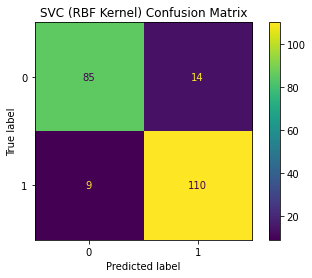

In [5]:
plot_confusion_matrix(rbf, X_test, y_test)
plt.title("SVC (RBF Kernel) Confusion Matrix")

# storing f1 score
rbf_f1_score= f1_score(y_test, rbf_pred_test, average='weighted')
print(classification_report(y_test, rbf_pred_test))

rbf_train_error= np.mean(rbf_pred_train!=y_train)
rbf_test_error= np.mean(rbf_pred_test != y_test)
print('SVC (RBF Kernel) Training Error = %.3f' % rbf_train_error)
print('SVC (RBF Kernel) Testing Error = %.3f' % rbf_test_error)

rbf_train_accuracy= rbf.score(X_train,y_train)
rbf_test_accuracy= rbf.score(X_test,y_test)
print('SVC (RBF Kernel) Training Accuracy Score = %.3f' % rbf_train_accuracy)
print('SVC (RBF Kernel) Testing Accuracy Score = %.3f' % rbf_test_accuracy)

rbf_pred_test_proba = rbf.predict_proba(X_test)[:, 1]
rbf_auc_score = roc_auc_score(y_test, rbf_pred_test_proba, multi_class='ovr')
print('SVC (RBF Kernel) Classifier: ROC AUC=%.3f' % rbf_auc_score)

<h2 style="color:Green;">Problem 2: Corporate Bond Ratings Prediction</h2><br/>

Companies issue bonds, which are debt securities, to raise funds that can be used to invest in the long-term future of the company. A corporate bond is a debt instrument from a company that investors can buy and, in doing so, pay the company the value of the bond upfront, which is called the principal amount. In return, the company pays the investor interest (called a coupon rate) on the bond's principal amount via periodic interest payments. At the bond's maturity date, which is typically in one to five years, the principal is paid back to the investor. Before investors buy a corporate bond, they need to know how financially stable the company that issued the bond is because this implies the ability of the company to pay back the bond obligations. Investors know this by looking at the bond ratings. 

According to Fitch Ratings,  bond rating of triple-A (AAA) signifies the highest investment grade and means that there is a very low credit risk. "AA" represents very high credit quality; "A" means high credit quality, and "BBB" is a satisfactory credit quality. These ratings are considered to be investment grade, which means that the security or entity being rated carries a high-enough quality level for most financial institutions to make investments in those securities. "BBB" is the lowest rating of investment-grade securities, while ratings below "BBB", like "C" or "D" is the lowest or junk quality.  

You are the head of Investment Analytics in a hedge fund company. Your subordinates gathered some financial metrics (e.g., current ratio, asset turnover) of 593 companies for you from 1/10/2014 to 9/9/2016. This data set is in the "corporate_rating.csv" file. Your goal is to predcit the bond ratings of companies that exhibit different financial properties based on these metric values. 

<p style="color:red;"> Please do add extra code chunks as needed for this problem. </p>

a) Please load in the financial metrics data that your subordinate collects and drop any columns that are irrelevant to the financial metrics. The remaining columns will be your features.

In [6]:
companyDATA=pd.read_csv('corporate_rating.csv')
companyDATA=companyDATA.drop(columns=['Date','Name','Symbol','Rating Agency Name'])
companyDATA.info()

LABEL='Rating'
FEATURES=companyDATA.columns[1:]
# Standardizing numerical indicators
companyDATA.loc[:, FEATURES] = scale(companyDATA.loc[:, FEATURES]) # standardizing indicators
# Encoding Ratings to numerical numbers
le = LabelEncoder()
le.fit(companyDATA.loc[:, LABEL])
companyDATA['Rating'] = le.fit_transform(companyDATA.loc[:, LABEL])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping
FEATURES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   currentRatio                        2029 non-null   float64
 2   quickRatio                          2029 non-null   float64
 3   cashRatio                           2029 non-null   float64
 4   daysOfSalesOutstanding              2029 non-null   float64
 5   netProfitMargin                     2029 non-null   float64
 6   pretaxProfitMargin                  2029 non-null   float64
 7   grossProfitMargin                   2029 non-null   float64
 8   operatingProfitMargin               2029 non-null   float64
 9   returnOnAssets                      2029 non-null   float64
 10  returnOnCapitalEmployed             2029 non-null   float64
 11  returnOnEquity                      2029 no

Index(['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')

b) Please identify your explanatory and response variables.

Explanatory Variables are all the financial features that are left (CurrentRatio, quickRatio, cashRatio, etc., until I decide to remove them as unimportant labels) and response variable is the rating of the company.

c) Please use Exploratory Data Analysis (EDA) techniques to pre-process the data set. Rememebr to re-define your X_train, X_test, and FEATURES  variables if you decided to drop any of the features.<br><br>
(Hint 1: if you use feature importance, please keep variables with scores of at least 0.025) <br>
(Hint 2: if you use label imbalance, you can remove observations with labels that exists less than 5% of the time)

[]

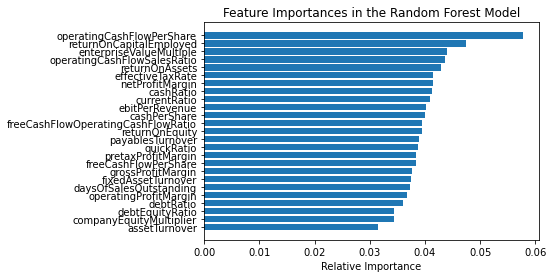

In [7]:
X_train, X_test, y_train, y_test = train_test_split(companyDATA.loc[:, FEATURES], companyDATA.loc[:, LABEL], test_size=0.2, random_state=0)

# Feature Importance
from sklearn.ensemble import RandomForestClassifier # importing the random forest module
rf_model = RandomForestClassifier(random_state=0) # define the random forest model
rf_model.fit(X_train, y_train) # fit the random forest model
importances = rf_model.feature_importances_ # get importance
indices = np.argsort(importances) # sort the features' index by their importance scores

plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

FEATURES_TO_DROP=[FEATURES[i] for i in indices[importances[indices] < 0.025]]
FEATURES_TO_DROP
# none of the features have importance below 0.025

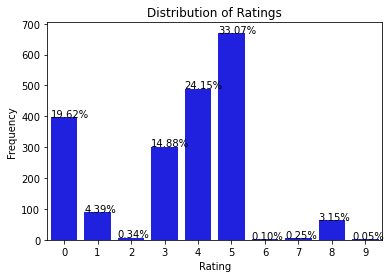

In [8]:
#counts=companyDATA.loc[:,LABEL].value_counts()

#LABELS_TO_DROP=[]
#for i in range(len(le_name_mapping)):
#    if counts[i]/total < 0.05:
#        LABELS_TO_DROP.append(i)

ax = sns.countplot(x = "Rating", data = companyDATA, color = 'blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
total = len(companyDATA["Rating"])

for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [9]:
#LABELS_TO_DROP
companyDATA = companyDATA[(companyDATA.Rating==0)|(companyDATA.Rating==3)|(companyDATA.Rating==4)|(companyDATA.Rating==5)]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(companyDATA.loc[:, FEATURES], companyDATA.loc[:, LABEL], test_size=0.2, random_state=0)

d) Implement at least two classification models to predict the bond ratings based on their financial metrics features, then output their performance results. Why did you choose these methods?

I chose Decision trees (using Random Forest) as my first model because random forest reduces overfitting and reduces the variance and thus improves the accuracy of the model. And also because the independent variables are likely correlated, random forest can handle it better than any other models and its multiple trees stabilize the algorithm.

In [11]:
# Create the parameter grid based on the results of random search 
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# fit the grid search to the training data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [18]:
#Create a Random Forest Classifier
rf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 2, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# predicted liquidity strengths 
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

Random Forest Training Error = 0.037
Random Forest Testing Error = 0.440
Random Forest Training Accuracy Score = 0.963
Random Forest Testing Accuracy Score = 0.560
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        91
           3       0.68      0.49      0.57        53
           4       0.51      0.46      0.48        94
           5       0.51      0.76      0.61       135

    accuracy                           0.56       373
   macro avg       0.62      0.53      0.55       373
weighted avg       0.60      0.56      0.55       373

Random Forest Classifier: ROC AUC=0.797


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


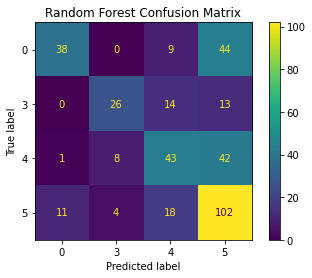

In [19]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")

rf_train_error= np.mean(rf_pred_train!=y_train)
rf_test_error= np.mean(rf_pred_test != y_test)
print('Random Forest Training Error = %.3f' % rf_train_error)
print('Random Forest Testing Error = %.3f' % rf_test_error)

rf_train_accuracy= rf.score(X_train,y_train)
rf_test_accuracy= rf.score(X_test,y_test)
print('Random Forest Training Accuracy Score = %.3f' % rf_train_accuracy)
print('Random Forest Testing Accuracy Score = %.3f' % rf_test_accuracy)

# storing f1 score
rf_f1_score= f1_score(y_test, rf_pred_test, average='weighted')
print(classification_report(y_test, rf_pred_test))

rf_pred_test_proba = rf.predict_proba(X_test)
rf_auc_score = roc_auc_score(y_test, rf_pred_test_proba, multi_class='ovr')
print('Random Forest Classifier: ROC AUC=%.3f' % rf_auc_score)

I am implementing another Decision tree algorithm except with a different method because both Kth Nearest Neighbor and Support Vector Machines don't do well with high dimensional data, especially like this one in which I have 25 independent variables. <br>
This time I am using Boosting because it weights over better and less important classfiers, and also it is less prone to overfitting.

In [14]:
from sklearn.ensemble import AdaBoostClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 200, 300, 1000],
    'learning_rate':[1, 5, 10]
}
# Create a based model
boosting = AdaBoostClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = boosting, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# fit the grid search to the training data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


{'learning_rate': 1, 'n_estimators': 200}

In [15]:
#Create a Boosting Classifier
boosting = AdaBoostClassifier(learning_rate= 1, n_estimators= 200)
#Train the model using the training sets y_pred=clf.predict(X_test)
boosting.fit(X_train,y_train)

# predicted liquidity strengths 
boosting_pred_train = boosting.predict(X_train)
boosting_pred_test = boosting.predict(X_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AdaBoost Training Error = 0.481
AdaBoost Testing Error = 0.542
AdaBoost Training Accuracy Score = 0.519
AdaBoost Testing Accuracy Score = 0.458
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        91
           3       0.42      0.47      0.45        53
           4       0.46      0.41      0.44        94
           5       0.46      0.47      0.46       135

    accuracy                           0.46       373
   macro avg       0.46      0.46      0.46       373
weighted avg       0.46      0.46      0.46       373

AdaBoost Classifier: ROC AUC=0.708


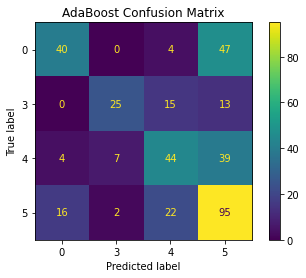

In [16]:
plot_confusion_matrix(rf, X_test, y_test)
plt.title("AdaBoost Confusion Matrix")


boosting_train_error= np.mean(boosting_pred_train!=y_train)
boosting_test_error= np.mean(boosting_pred_test != y_test)
print('AdaBoost Training Error = %.3f' % boosting_train_error)
print('AdaBoost Testing Error = %.3f' % boosting_test_error)

boosting_train_accuracy= boosting.score(X_train,y_train)
boosting_test_accuracy= boosting.score(X_test,y_test)
print('AdaBoost Training Accuracy Score = %.3f' % boosting_train_accuracy)
print('AdaBoost Testing Accuracy Score = %.3f' % boosting_test_accuracy)

# storing f1 score
boosting_f1_score= f1_score(y_test, boosting_pred_test, average='weighted')
print(classification_report(y_test, boosting_pred_test))

boosting_pred_test_proba = boosting.predict_proba(X_test)
boosting_auc_score = roc_auc_score(y_test, boosting_pred_test_proba, multi_class='ovr')
print('AdaBoost Classifier: ROC AUC=%.3f' % boosting_auc_score)

<p style="color:red;"> Please do add extra code chunks as needed for this problem. </p>

e) Compare your models' performance results from above. What can you conclude from this? Which model perform better?

Random Forest obviously performs much better than Boosting because it has lower test error, higher test accuracy, higher overall accuracy by the F1 score, and a higher AUC score which allows it to distinguish between classes more correctly than Boosting.

In [20]:
df = pd.DataFrame(data={
         'Model':['Random Forest', 'Boosting'],
         'Train Error':[rf_train_error, boosting_train_error],
         'Test Error':[rf_test_error, boosting_test_error],
         'Train Accuracy':[rf_train_accuracy, boosting_train_accuracy],
         'Test Accuracy':[rf_test_accuracy, boosting_test_accuracy],
         'F1 Score':[rf_f1_score, boosting_f1_score],
         'AUC Score':[rf_auc_score, boosting_auc_score]})
df

,Model,Train Error,Test Error,Train Accuracy,Test Accuracy,F1 Score,AUC Score
0,Random Forest,0.036962,0.439678,0.963038,0.560322,0.554197,0.797186
1,Boosting,0.481183,0.541555,0.518817,0.458445,0.458225,0.707510


f) How do you think bond ratings can affect stock prices?

Bond ratings reflect how professional agencies think about the volatility or risk or return of whatever the company sells. It is a general evaluation of the value of the company. If the rating agencies think that the company's bond is no longer good, it more or less means the company itself isn't worth as much value as it previously think it is. In that way, stock prices also somewhat reflects the investors' speculation of the value of the company. Since the bond ratings are bad, that will also affect how investors view the value of the company, so it makes since if stock prices does correlate positively with the bond ratings.